# Задание 5. Линейный фильтр Калмана
# Постоянное вращение тела на  струне

In [106]:
import numpy as np
import math
import matplotlib.pyplot as plt

## Модель движения и модель измерений

In [322]:
timeModel = 1
timeStep = 0.01
time = np.arange(0, timeModel, timeStep)

endAngle = math.pi / 3
dfi =  endAngle / (timeModel / timeStep)
print(dfi)

data = np.array([[fi, dfi] for fi in np.arange(0, endAngle, dfi)])
motModel = np.array([[oneData[1], 0] for oneData in data])
measModel = np.array([oneData[1] + np.random.normal(0, 0.1) for oneData in data])

0.010471975511965976


## График угловой сокрости (зеленый - оригинальная угловая скорость, синий - с шумами измерения)

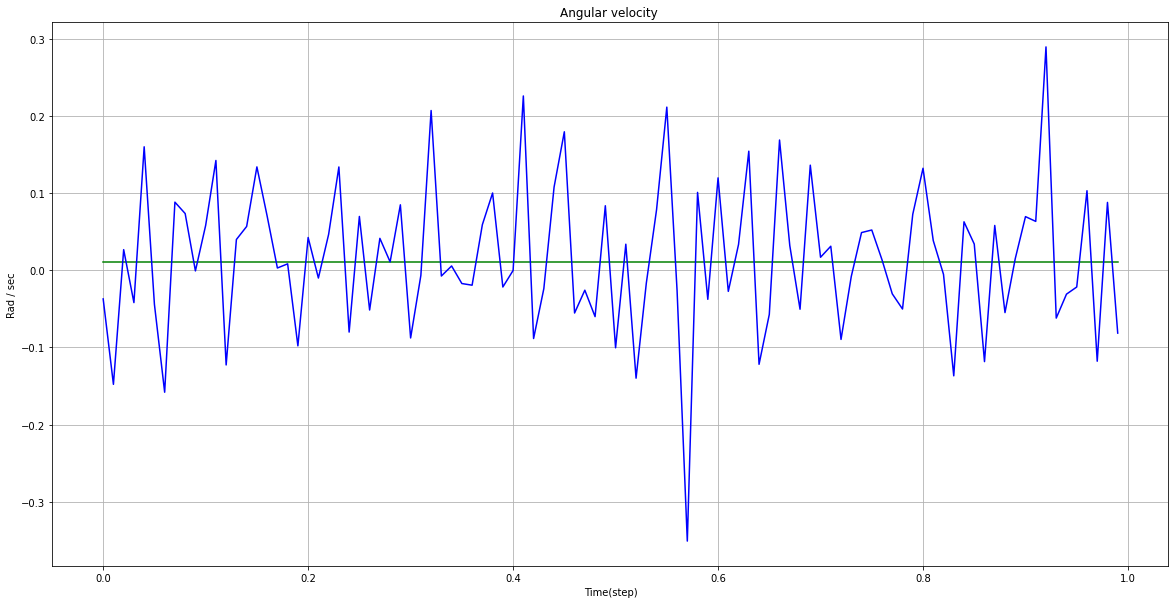

In [327]:
plt.figure(figsize=(20,10))
plt.plot(time, motModel[:, 0],"g")
plt.plot(time, measModel,"b")
plt.title('Angular velocity ') 
plt.ylabel('Rad / sec')
plt.xlabel('Time(step)')
plt.grid(True)
plt.show()

## График значения угла

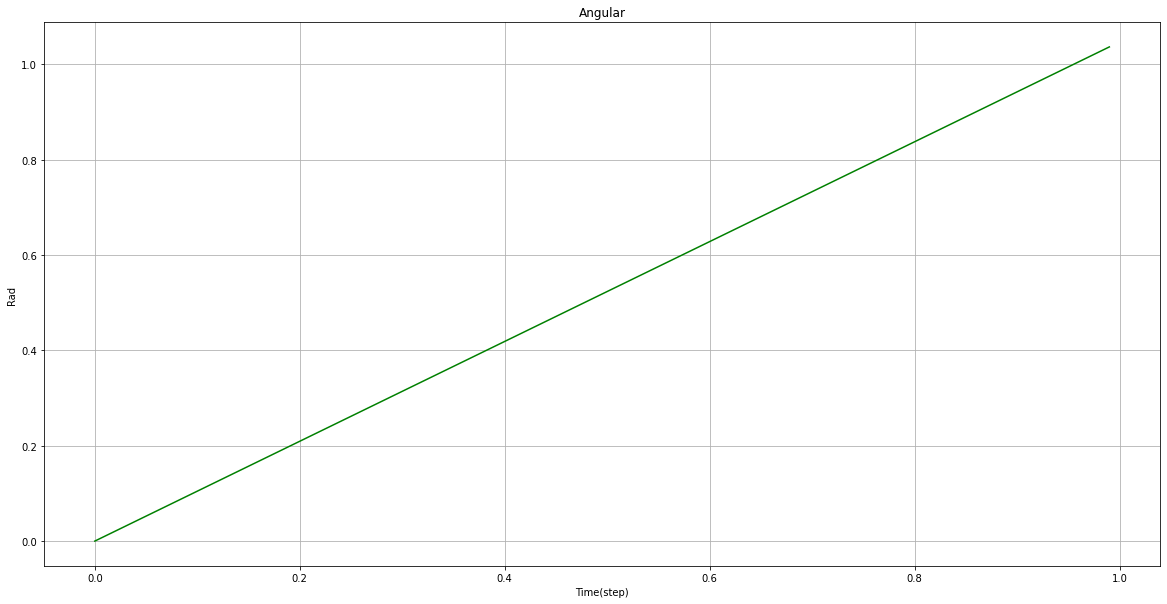

In [328]:
plt.figure(figsize=(20,10))
plt.plot(time, data[:, 0],"g")
plt.title('Angular') 
plt.ylabel('Rad')
plt.xlabel('Time(step)')
plt.grid(True)
plt.show()

## Уравнение Риккати

In [329]:
a_0 = 1
b_0 = 0 
c_0 = 1
t_0 = 0
 
C1 = c_0
C2 = b_0 - c_0 * t_0
C3 = a_0 - 2 * b_0 * t_0 + c_0 * (t_0) ** 2

Riccati = np.array([[C1 * (t ** 2) + 2 * C2 * t + C3, \
            C1 * t + C2, \
            C1] for t in time])

## Фильтр Калмана через модель Риккати

In [ ]:
Xdot = np.array([[i[1], C2] for i in Riccati])
fiCap = Xdot[:, 1]

R = measModel - fiCap

fiNew = [Xdot[i, 0] + (Riccati[i, 1] * (measModel[i] - Xdot[i, 1])) / (Riccati[i, 2] - R[i]) for i in range(len(time))]
dfiNew = [Xdot[i, 1] + (Riccati[i, 2] * (measModel[i] - Xdot[i, 1])) / (Riccati[i, 2] - R[i]) for i in range(len(time))]

## График значения угла оцененного фильтром Калмана (синий)

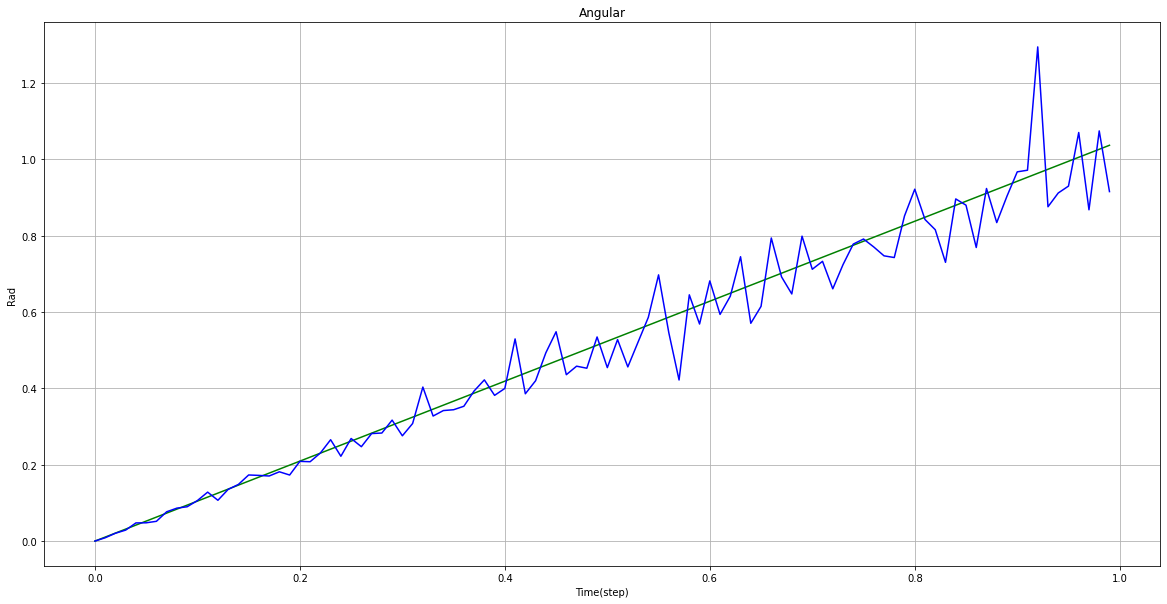

In [331]:
plt.figure(figsize=(20,10))
plt.plot(time, data[:, 0],"g")
plt.plot(time, fiNew,"b")
plt.title('Angular') 
plt.ylabel('Rad')
plt.xlabel('Time(step)')
plt.grid(True)
plt.show()

## График угловой сокрости оцененного фильтром Калмана (зеленый - оценненая угловая скорость, синий - угловая скорость с шумами измерения)

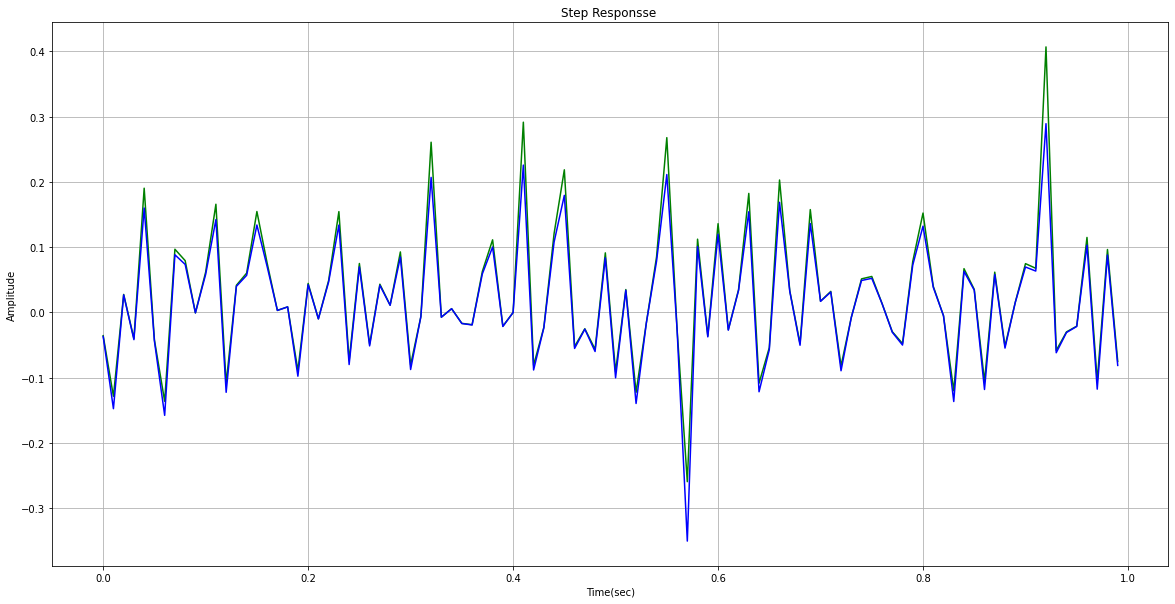

In [332]:
plt.figure(figsize=(20,10))
plt.plot(time, dfiNew,"g")
plt.plot(time, measModel,"b")
plt.title('Step Responsse ') 
plt.ylabel('Amplitude')
plt.xlabel('Time(sec)')
plt.grid(True)
plt.show()